In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats     #To draw the QQ plot    
from sklearn.impute import KNNImputer

In [222]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [223]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [224]:
# Checking the null values
(df.isnull().sum() / df.shape[0]) * 100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Imputing the Null values of age using mean, median

In [225]:
df['age'].mean()

29.69911764705882

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'kde plot af age'}, xlabel='age', ylabel='Density'>

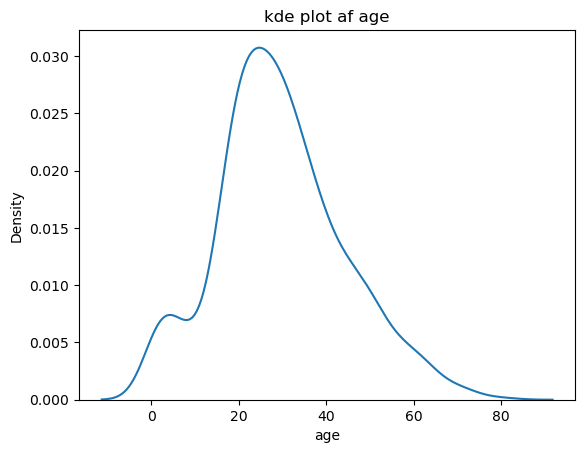

In [226]:
plt.title("kde plot af age")
sns.kdeplot(data=df,x='age')

# # To draw the QQ plot for the Age columnto identify the distribution 
# plt.figure(figsize=(8,8))
# stats.probplot(df['age'],dist='norm',plot=plt)
# plt.title('QQ plot Age')
# plt.show()


In [227]:
df_imputeage = df.copy()
df_imputeage['age']=df['age'].fillna(df['age'].mean())

In [228]:
print('variance of age before imputation : ',df['age'].var())
print('variance of age after imputation : ',df_imputeage['age'].var())


variance of age before imputation :  211.0191247463081
variance of age after imputation :  169.05239993721085


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


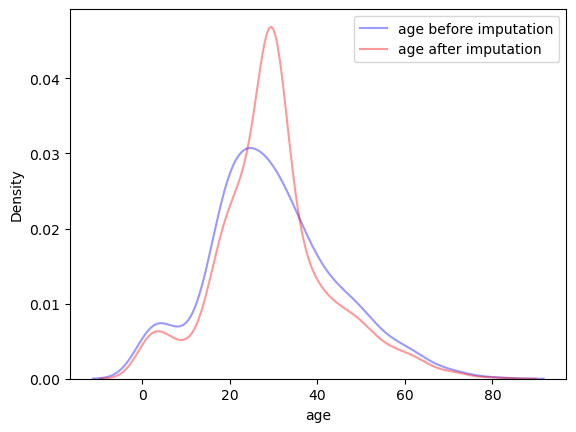

In [229]:
sns.kdeplot(data=df,x='age',color='blue',label='age before imputation',alpha=0.4)
sns.kdeplot(data=df_imputeage,x='age',color='red',label='age after imputation',alpha=0.4)
plt.legend()  # Ensure the legend/label is displayed
plt.show()

### Since the variance and distribution of age has changed significantly after mean/mdeina/mode imputation ... We discard the mean imputation and other better imputation technique such as multivariate imputation (i.e knn)

## Imputing the Null values of Age column using KNN iputer

In [230]:
imputer = KNNImputer(n_neighbors=3,weights='distance')
imputed_age = imputer.fit_transform(df[['age','fare']])
df_knnimputeage = pd.DataFrame(imputed_age,columns=['age','fare'])
df_knnimputeage

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,18.666667,23.4500
889,26.000000,30.0000


In [231]:
print('variance of age before imputation : ',df['age'].var())
print('variance of age after KNN imputation : ',df_knnimputeage['age'].var())


variance of age before imputation :  211.0191247463081
variance of age after KNN imputation :  185.18559915421156


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


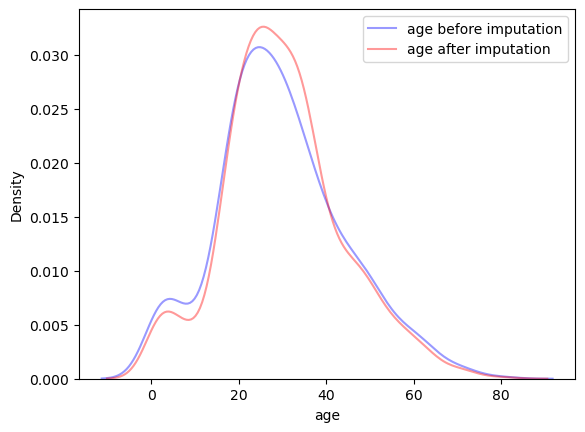

In [236]:
sns.kdeplot(data=df,x='age',color='blue',label='age before imputation',alpha=0.4)
sns.kdeplot(data=df_knnimputeage,x='age',color='red',label='age after imputation',alpha=0.4)
plt.legend()  # Ensure the legend/label is displayed
plt.show()

In [233]:
print("Correlation before imputation")
df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()

Correlation before imputation


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [234]:
print("Correlation after mean/median imputation")
df_imputeage[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()

Correlation after mean/median imputation


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


### Since there is no significant change in varaince and distribution of age column before and after imputation . So we choose KNN imputer